In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_data = pd.read_csv("/content/co2.csv")


In [ ]:
xf = ['Engine Size(L)' , 'Cylinders' , 'Fuel Consumption Comb (L/100 km)' , 'Fuel Consumption City (L/100 km)' , 'Fuel Consumption Hwy (L/100 km)']
X_train = train_data[xf].values
Y_train = train_data['CO2 Emissions(g/km)'].values


In [ ]:
X_train_min = X_train.min(axis=0)
X_train_max = X_train.max(axis=0)
X_train = (X_train - X_train_min) / (X_train_max - X_train_min)

In [ ]:
np.random.seed(0)
weights = np.random.rand(X_train.shape[1])
bias = 0.0
learning_rate = 0.01
num_iterations = 10000
m = len(Y_train)

cost func = 1/2m * summation of (hypothesis fxn - y)^2

In [ ]:
for _ in range(num_iterations):
    y_pred = np.dot(X_train, weights) + bias
    error = y_pred-Y_train

    weights_gradient = (2/m)*np.dot(X_train.T, error)
    bias_gradient = (2/m)*np.sum(error)

    weights-=learning_rate*weights_gradient
    bias-=learning_rate*bias_gradient

y_test_pred = np.dot(X_train, weights) + bias

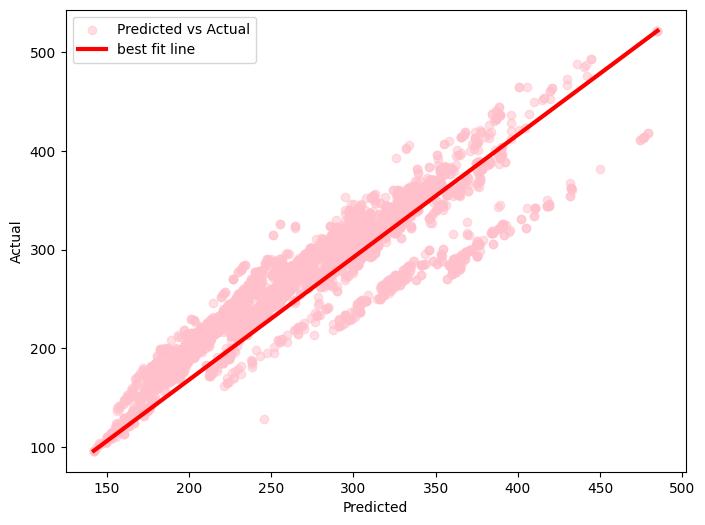

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test_pred, Y_train, color = 'pink' , alpha = 0.5 , label = 'Predicted vs Actual')
plt.plot([y_test_pred.min(), y_test_pred.max()] , [Y_train.min(), Y_train.max()] , color='red', linewidth = 3, label = "best fit line")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.legend()
plt.show()



In [ ]:
mae = np.mean(np.abs(Y_train -y_test_pred))
mse = np.mean((Y_train-y_test_pred) ** 2)
rmse = np.sqrt(mse)

y_mean = np.mean(Y_train)
total = np.sum((Y_train-y_mean)**2)
residual = np.sum((Y_train-y_test_pred)**2)
r2 = 1-(residual / total)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 13.57522935100456
Mean Squared Error (MSE): 416.8143441162983
Root Mean Squared Error (RMSE): 20.41603154671099
R-squared (R²): 0.8782408811386174
